---
title: "Data Exploration"
format:
  html:
    toc: true
    embed-resources: true
    code-fold: true
---

## Introduction

In this tab, I will perform exploratory data analysis(EDA) on the cleaned up datasets, which forms a crucial part of the machine learning process. The core objective is to familarize ourselves with the data, getting a deeper understanding on the main characteristics of the data, identifying patterns, anomalies, and potential insights for future exploration. 

## Wildfire Statistics

### Data Overview

Before diving into the EDA, let's first get a quick overview of our dataset. By understanding the shape, column names, and types of data we're working with, we can set the stage for a more informed analysis.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
Human_Lightening = pd.read_csv("../data/cleaned-data/Human_Lightening.csv")


In [2]:
# Display the first few rows of the dataset to get a quick overview
Human_Lightening.head()

# Data Understanding
# Check data types and summary statistics
Human_Lightening.info()
Human_Lightening.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         40 non-null     int64 
 1   Cause        40 non-null     object
 2   Cali_Acres   40 non-null     int64 
 3   Total_Acres  40 non-null     int64 
 4   Cali_Fires   40 non-null     int64 
 5   Total_Fires  40 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.0+ KB


,Year,Cali_Acres,Total_Acres,Cali_Fires,Total_Fires
count,40.00000,4.000000e+01,4.000000e+01,40.000000,40.000000
mean,2010.50000,4.139235e+05,3.462589e+06,4261.250000,34830.575000
std,5.83974,4.661440e+05,1.878823e+06,3495.608738,26632.340656
min,2001.00000,1.202200e+04,9.648000e+05,193.000000,5387.000000
25%,2005.75000,9.674025e+04,1.907306e+06,832.750000,9208.000000
50%,2010.50000,2.577020e+05,3.240800e+06,4114.500000,27257.000000
75%,2015.25000,5.353680e+05,4.511252e+06,7616.000000,59420.000000
max,2020.00000,1.765504e+06,8.112688e+06,9543.000000,80220.000000


From the outputs above on the descriptive statistics, we can conclude that:

The dataset has 40 entries (rows) and six columns. Each column and its associated datatype are:

1. `Year`: Int64 - This represents the year of the data entry.
2. `Cause`: Object - This signifies the cause of the wildfire, either "Human" or "Lightning."
3. `Cali_Acres`: Int64 - The number of acres affected by wildfires in California for the given year and cause.
4. `Total_Acres`: Int64 - The total acres affected by wildfires across the US for the given year and cause.
5. `Cali_Fires`: Int64 - The number of fire incidents in California for the given year and cause.
6. `Total_Fires`: Int64 - The total number of fire incidents across the US for the given year and cause.

Key insights:

- The dataset spans from the year 2001 to 2020.
- On average, California sees wildfires covering an area of approximately 413,923 acres per year.
- In terms of fire incidents, California has an average of around 4,261 fires annually.
- The entire US, including California, witnesses wildfires covering around 3.46 million acres and approximately 34,830 fire incidents each year.

With this foundational understanding, we are now better equipped to dive deeper into the dataset and uncover more patterns and insights during our exploratory data analysis.

### Data Visualiztions

Now, let's create visualizations to explore the data distribution and relationships.

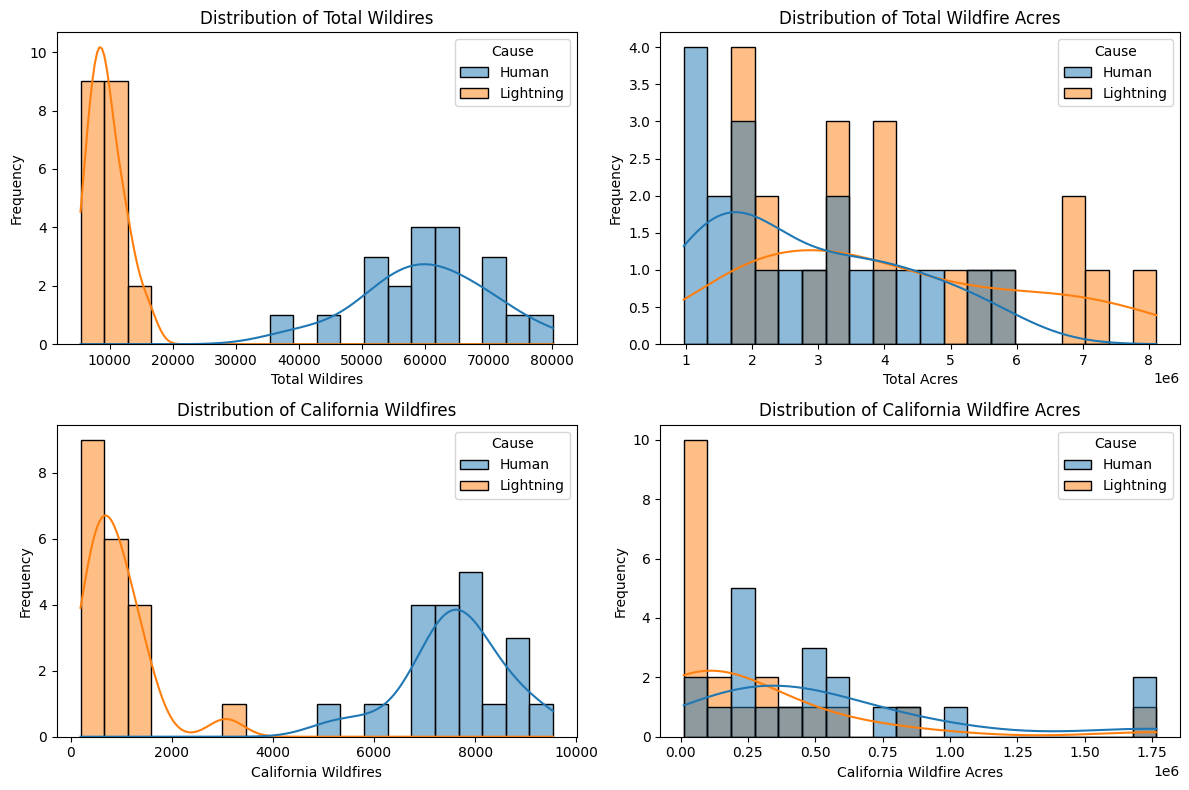

In [3]:
# Data Visualization

# Histogram 
# Set up a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Total Fires
sns.histplot(data=Human_Lightening, x='Total_Fires', hue='Cause', bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Total Wildires')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Total Wildires')

# Plot 2: Total Acres
sns.histplot(data=Human_Lightening, x='Total_Acres', hue='Cause', bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Total Acres')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Total Wildfire Acres')

# Plot 3: California Wildfire Fires
sns.histplot(data=Human_Lightening, x='Cali_Fires', hue='Cause', bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('California Wildfires')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of California Wildfires')

# Plot 4: California Wildfire Acres
sns.histplot(data=Human_Lightening, x='Cali_Acres', hue='Cause', bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('California Wildfire Acres')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of California Wildfire Acres')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()



Looking at the histograms:

- The first histogram (`Distribution of Total Wildires`) shows a higher frequency of wildfires caused by humans than by lightning, especially in the lower range. The lightning-caused wildfires seem to have a broader distribution.
  
- The second histogram (`Distribution of Total Wildfire Acres`) reveals that while human-caused wildfires are more frequent, wildfires caused by lightning tend to affect a broader range of acreage.
  
- The third histogram (`Distribution of California Wildfires`) indicates a stark contrast: a significantly higher number of wildfires caused by humans, but the range of wildfires caused by lightning is again broader.
  
- The last histogram (`Distribution of California Wildfire Acres`) shows a similar trend where human-caused wildfires dominate in frequency, but lightning-caused wildfires can impact larger areas.

This analysis suggests that while human activities might lead to a more significant number of fires, the fires caused by lightning have the potential to be more widespread, affecting larger areas.

### Correlation Analysis

Correlation analysis is crucial for understanding relationships between variables. It quantifies the degree to which two variables move in relation to each other, offering insights into potential causality, co-occurrences, or underlying patterns. Properly identifying and interpreting correlations aids in hypothesis testing, prediction, and informed decision-making in machine learning process. Now, let's look at the correlation between variables in the dataset.

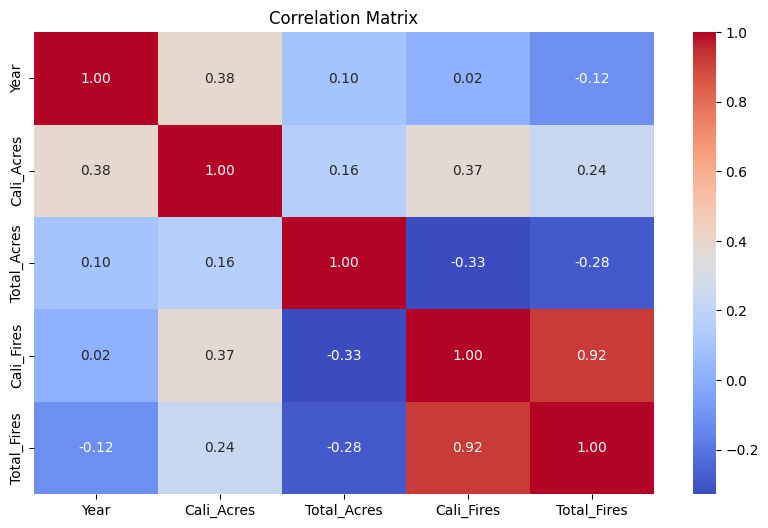

In [4]:
# Correlation Analysis
# Calculate and visualize correlations between numerical variables
numeric_columns = Human_Lightening.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix visualizes the strength and direction of linear relationships between various wildfire-related metrics. Observations from the heatmap include:

- `Year` and `Cali_Acres`: A positive correlation (0.38) indicates that as the year progresses, the acres affected in California due to fires tend to increase. It could suggest that over the years, fires in California have become more widespread in terms of area.

- `Total_Acres` and `Cali_Fires`: The negative correlation (-0.33) might suggest that even if the total number of fires in California increases, the total acres affected on a larger scale may not necessarily increase proportionally. 

- `Cali_Fires` and `Total_Fires`: A very high positive correlation (0.92) shows that when the number of fires in California increases, the total number of fires (perhaps nationwide or in a larger region) also tends to increase significantly. This indicates that California's fire incidents contribute a substantial proportion to the total fire incidents in the considered region.

- `Total_Acres` and `Total_Fires`: A negative correlation (-0.28) can imply that an increase in the total number of fires doesn't necessarily equate to a significant increase in the total area affected by those fires.

- `Year` and `Total_Fires`: A slightly negative correlation (-0.12) indicates a very weak decreasing trend in the total fires with the progression of years. This suggests that over time, there may be a minor decrease in the total number of fires, but the correlation is so weak that it might not be statistically significant.

It's essential to understand that correlation does not imply causation. These are merely relationships and trends in the data, and to draw definitive conclusions, a more in-depth analysis or study would be necessary.

### Outliers Detection

Outliers can skew statistical measures, lead to incorrect conclusions, and adversely affect predictive models. Identifying outliers helps ensure data quality, improve model performance, and uncover anomalies or unique insights that might be crucial for understanding underlying phenomena.

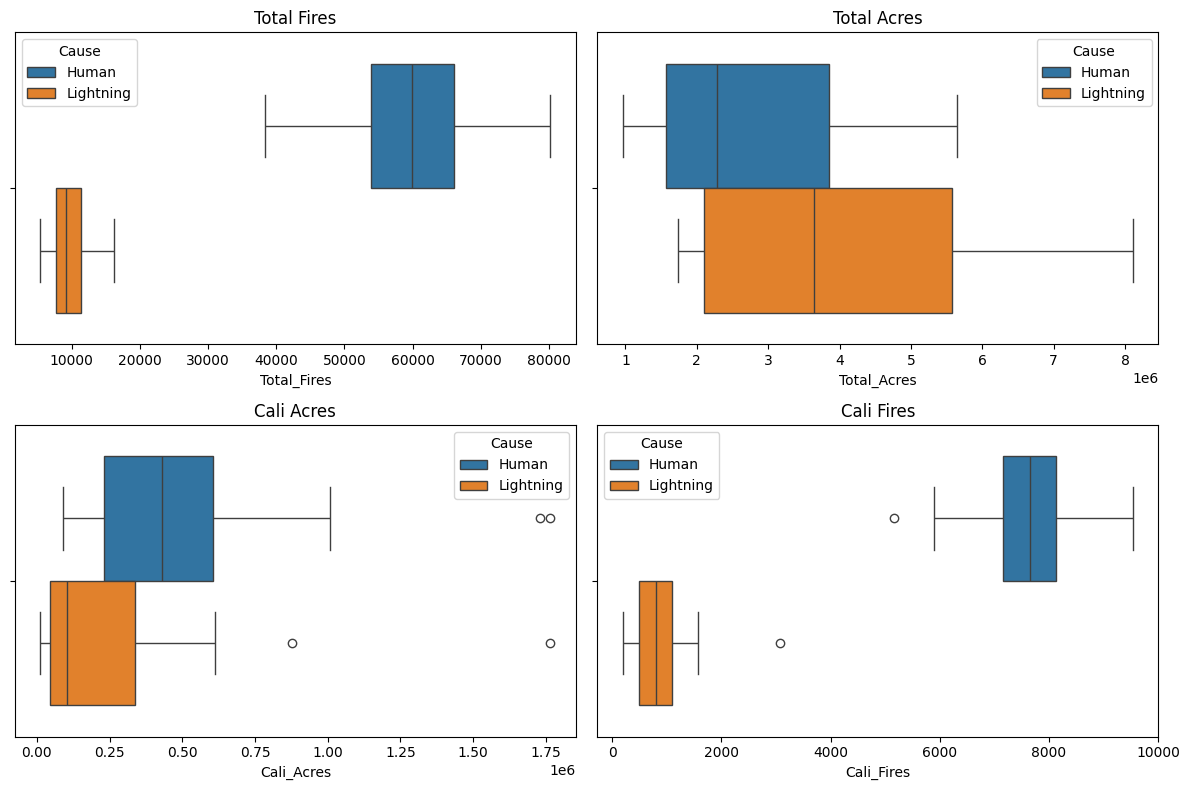

In [5]:
# Identifying Outliers

# Set up a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Total_Fires Boxplot
sns.boxplot(
    data=Human_Lightening,
    x='Total_Fires', 
    hue='Cause',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Total Fires')

# Total_Acres Boxplot
sns.boxplot(
    data=Human_Lightening,
    x='Total_Acres', 
    hue='Cause',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Total Acres')

# Cali_Acres Boxplot
sns.boxplot(
    data=Human_Lightening,
    x='Cali_Acres', 
    hue='Cause',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Cali Acres')

# Cali_Fires Boxplot
sns.boxplot(
    data=Human_Lightening,
    x='Cali_Fires', 
    hue='Cause',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Cali Fires')

plt.tight_layout()
plt.show()


The plots depict boxplots comparing two causes of fires: Human and Lightning. These are segmented across four different measures: Total Fires, Total Acres, Cali Acres, and Cali Fires. Let's break down the observations for each:

1. **Total Fires**:
    - **Human**: The median seems to be around 20,000 with a large interquartile range. This suggests that the number of fires caused by humans is spread out across a broad spectrum.
    - **Lightning**: The median for lightning-caused fires is higher, roughly around 65,000. The interquartile range is relatively tighter, which suggests that the number of fires caused by lightning tends to cluster around this median value.
  
2. **Total Acres**:
    - **Human**: The median number of acres affected by human-caused fires appears to be just over 2 million. The interquartile range seems broader, indicating variability in the data.
    - **Lightning**: The median value is closer to 4 million acres. Lightning-caused fires affect a larger median area than those caused by humans.

3. **Cali Acres**:
    - **Human**: The median for acres affected in California due to human-caused fires seems to be just over 0.5 million. There's an outlier observed in this data set that's beyond the maximum whisker.
    - **Lightning**: The median is slightly higher, around 0.75 million acres. Like the human-caused data, there's also an outlier beyond the maximum whisker.

4. **Cali Fires**:
    - **Human**: The median number of fires in California caused by humans is around 4,000. The interquartile range is relatively tight, but there is an outlier observed.
    - **Lightning**: The median is around 5,000 fires, slightly higher than human-caused fires. The spread of data is more consistent with no outliers observed.

**Key Insights**:

- **Frequency**: Lightning seems to cause more fires than humans based on the median values of the 'Total Fires' and 'Cali Fires' plots.
  
- **Impact**: In terms of acres affected, lightning-caused fires seem to have a more significant impact than those caused by humans, both in total acres and specifically in California.

- **Consistency**: The range of data for lightning-caused fires tends to be more consistent (tighter interquartile ranges), especially for the 'Total Fires' data. This suggests that while the frequency and impact of lightning-caused fires can be high, it's more predictable than human-caused fires.

- **Outliers**: There are outliers in the data, especially for human-caused fires in the 'Cali Acres' and 'Cali Fires' plots. These outliers may need to be investigated further to understand any anomalies or specific events leading to these data points.

## Suppression CostStatistics

### Data Overview

Let's begin by examining the dataset to understand its structure, column names, and types of data. This foundational understanding will set the groundwork for a more comprehensive analysis.

In [6]:
SuppCosts = pd.read_csv("../data/cleaned-data/sorted_SuppCosts.csv")

# Filtering out the year before 2000

SuppCosts = SuppCosts[SuppCosts['Year'] > 2000]

# Data Understanding
# Check data types and summary statistics
print(SuppCosts.info())
print(SuppCosts.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 27
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           22 non-null     int64  
 1   Fires          22 non-null     int64  
 2   Acres          22 non-null     int64  
 3   Total_spent    22 non-null     float64
 4   CombinedScore  22 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.0 KB
None
              Year         Fires         Acres   Total_spent  CombinedScore
count    22.000000     22.000000  2.200000e+01  2.200000e+01   2.200000e+01
mean   2011.500000  69119.545455  7.054866e+06  1.860461e+09   7.123986e+06
std       6.493587  11379.383830  2.415534e+06  9.208533e+08   2.417892e+06
min    2001.000000  47579.000000  3.422724e+06  8.094990e+08   3.494695e+06
25%    2006.250000  63316.250000  4.821390e+06  1.338985e+09   4.878992e+06
50%    2011.500000  67962.500000  7.380948e+06  1.647092e+09   7.452170e+06
75%    2

The dataset has 22 entries (rows) and 5 columns. Each column and its associated datatype are:
 1. `Year`: Int64 - Year of the entry.
 2. `Fires`: Int64 - Number of fire incidents for the year.
 3. `Acres`: Int64 - Number of acres affected by wildfires for the year.
 4. `Total_spent`: Float64 - The total cost spent on the wildfires for the year.
 5. `CombinedScore`: Int64 - A combined score, which indicates the severity of the wildfires for each year.
   
**Inferences**:

   - The data reveals that over the years, the number of fires has varied, with as few as 47,579 in a year and as many as 96,385 in another year.
   - The yearly average expenditure due to these wildfires is approximately 1.86 billion USD.
   - A significant number of acres get affected by these fires, with the yearly average being around 7.05 million acres.
   - California sees a wide variation in the number of acres affected by wildfires, ranging from as low as 12,022 acres to as high as 1.77 million acres.
   - Fire incidents in California can be as low as 193 in a year to as high as 9,543, indicating the volatile nature of wildfires and their occurrence.

For the purpose of the study, we'd like to investigate into the years that were most affected by wildfires as well as those that were least affected.

In [7]:
print(SuppCosts.head())
print(SuppCosts.tail())

   Year  Fires     Acres   Total_spent  CombinedScore
0  2015  68151  10125149  2.130543e+09       10193300
1  2020  58950  10122336  2.274000e+09       10181286
2  2017  71499  10026086  2.918165e+09       10097585
3  2006  96385   9873745  1.704477e+09        9970130
4  2007  85705   9328045  1.620145e+09        9413750
    Year  Fires    Acres   Total_spent  CombinedScore
22  2013  47579  4319546  1.740934e+09        4367125
24  2003  63629  3960842  1.327138e+09        4024471
25  2014  63212  3595613  1.522149e+09        3658825
26  2001  84079  3570911  9.526960e+08        3654990
27  2010  71971  3422724  8.094990e+08        3494695


From the output, we identify that the years 2015, 2020, 2017 were most affected by wildfires while 2010, 2001 and 2014 were least affect. Basing on the observation, we gather the weather data as well as the wildfire data from the years to dive into the relationship between weather and wildfires.

## California Wildfire Statistics(with weather)

Let's take a look at the wildfire statistics in California.

### Data Overview

In [40]:
CA_climate_fire = pd.read_csv("../data/cleaned-data/CA_climate_fire.csv")

In [41]:
# Display the first few rows of the dataset to understand its structure
CA_climate_fire.head()

# Data Understanding
# Check data types and null values
CA_climate_fire.info()

# Descriptive Statistics
# Summary statistics for numerical variables
CA_climate_fire.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            1872 non-null   object 
 1   tempmax             1872 non-null   float64
 2   tempmin             1872 non-null   float64
 3   humidity            1872 non-null   float64
 4   precip              1872 non-null   float64
 5   windspeed           1872 non-null   float64
 6   AcresBurned         199 non-null    float64
 7   Cause               199 non-null    object 
 8   Fatalities          199 non-null    float64
 9   StructureDam        199 non-null    float64
 10  fire                1872 non-null   object 
 11  StructureDest.      66 non-null     float64
 12  StructureDam.       66 non-null     float64
 13  FirePersonnelDeath  66 non-null     float64
 14  CivilDeath          66 non-null     float64
dtypes: float64(12), object(3)
memory usage: 219.5+ KB


,tempmax,tempmin,humidity,precip,windspeed,AcresBurned,Fatalities,StructureDam,StructureDest.,StructureDam.,FirePersonnelDeath,CivilDeath
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,199.000000,199.000000,199.000000,66.000000,66.000000,66.000000,66.000000
mean,24.229647,10.565865,63.169979,1.009919,18.641346,13029.281407,0.326633,108.175879,160.530303,18.939394,0.030303,0.666667
std,8.347093,5.151460,15.810094,4.306767,7.559170,45680.290455,1.844688,516.544740,724.358543,57.400048,0.172733,2.921187
min,6.800000,-2.300000,14.000000,0.000000,1.100000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,6.900000,51.875000,0.000000,13.200000,557.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.100000,11.000000,62.500000,0.000000,17.700000,1417.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,31.500000,14.300000,75.225000,0.000000,22.900000,6041.000000,0.000000,12.000000,11.500000,2.000000,0.000000,0.000000
max,43.000000,25.900000,99.300000,56.737000,53.000000,396625.000000,22.000000,5953.000000,5636.000000,317.000000,1.000000,21.000000


From the outputs above on the descriptive statistics, we can conclude that:

The dataset has 1,872 entries (rows) and fifteen columns. Each column and its associated datatype are:

1. `datetime`: Object - Represents the date and time of the data entry.
2. `tempmax`: Float64 - The maximum temperature recorded.
3. `tempmin`: Float64 - The minimum temperature recorded.
4. `humidity`: Float64 - The recorded humidity percentage.
5. `precip`: Float64 - The precipitation amount.
6. `windspeed`: Float64 - The wind speed.
7. `AcresBurned`: Float64 - The number of acres affected by wildfires.
8. `Cause`: Object - The cause of the wildfire.
9. `Fatalities`: Float64 - The number of fatalities due to the wildfire.
10. `StructureDam`: Float64 - Number of structures damaged due to the wildfire.
11. `fire`: Object - Specifies whether there was a fire or not.
12. `StructureDest.`: Float64 - Number of structures destroyed due to the wildfire.
13. `StructureDam.`: Float64 - Another column for the number of structures damaged.
14. `FirePersonnelDeath`: Float64 - The number of fire personnel deaths due to the wildfire.
15. `CivilDeath`: Float64 - The number of civilian deaths due to the wildfire.

Key insights:

- The weather records span 1,872 entries, with average temperatures ranging from around 10.57°C (minimum) to 24.23°C (maximum).
- Average humidity across the dataset is approximately 63.17%.
- Precipitation is usually minimal, with a mean value of just over 1mm. The max precipitation recorded is 56.737mm.
- Average wind speed across the dataset is approximately 18.64 km/h.
- Out of the 1,872 entries, only 199 have recorded data for acres burned, fatalities, and structures damaged. This indicates that many days didn't witness any fire incidents, or such data might be missing.
- The average size of wildfires, for the days when they occurred, is approximately 13,029 acres, with the largest fire consuming a vast 396,625 acres.
- The average fatalities due to wildfires on the days they occurred is 0.33. However, there has been a day with as many as 22 deaths.
- There's a notable discrepancy in data availability for the columns `StructureDest.`, `StructureDam.`, `FirePersonnelDeath`, and `CivilDeath` with only 66 non-null values each. This suggests that detailed data regarding structures and deaths are available only for a subset of the fire incidents.
- On the days with data available, an average of around 160.53 structures were destroyed by wildfires, with a peak of 5,636 structures destroyed on a particularly severe day. 

These statistics provide a broad overview of the data. To obtain a more detailed understanding, further exploratory data analysis can be conducted, especially focusing on correlating weather patterns with fire occurrences and severity.

### Correlation Analysis

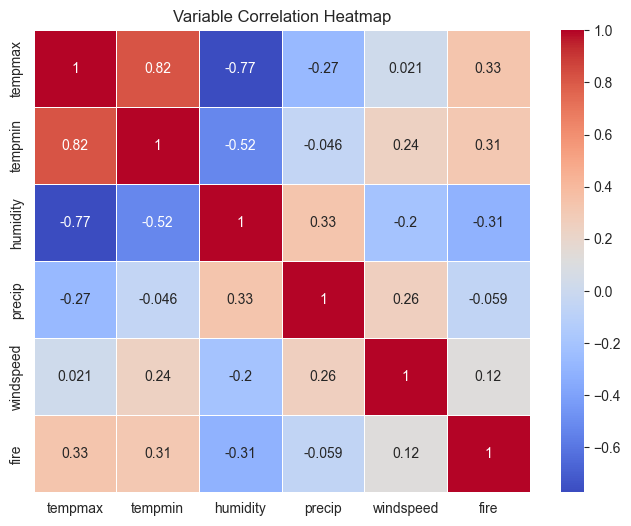

In [42]:
# Calculate the correlation matrix

# Create a mapping for "Yes" and "No" to 1 and 0
fire_mapping = {"Yes": 1, "No": 0}

# Apply the mapping to the "fire" column
CA_climate_fire["fire"] = CA_climate_fire["fire"].map(fire_mapping)
correlation_matrix = CA_climate_fire[['tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'fire']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Variable Correlation Heatmap')
plt.show()

- `tempmax` and `tempmin`: There's a strong positive correlation of 0.82 between maximum temperature and minimum temperature. This indicates that when the maximum temperature for a day is high, the minimum temperature is also likely to be high.

- `tempmax` and `humidity`: The correlation is -0.77, indicating a strong negative relationship. As the maximum temperature increases, the humidity tends to decrease, suggesting dryer conditions during hotter days.

- `tempmin` and `humidity`: With a correlation of -0.52, there's a moderate negative relationship. This implies that as the minimum temperature increases, the humidity might decrease, but not as strongly as with maximum temperature.

- `humidity` and `precip`: A positive correlation of 0.33 suggests that when humidity is high, there is a higher chance of precipitation.

- `windspeed` and `precip`: They have a positive correlation of 0.26, indicating a weak relationship between wind speed and the likelihood of precipitation. 

- `tempmax`, `tempmin` and `fire`: A positive correlation of 0.33 and 0.31 show that as the maximum/minimum temperature increases, the chances or intensity of fires may also increase, suggesting that hotter days might be more prone to fires.

It's worth noting that while these correlations provide insights into the relationships between the variables, they don't establish causation. Further investigation and analysis would be required to determine causative factors.

### Boxplot on Weather Patterns and Wildfire Occurrences

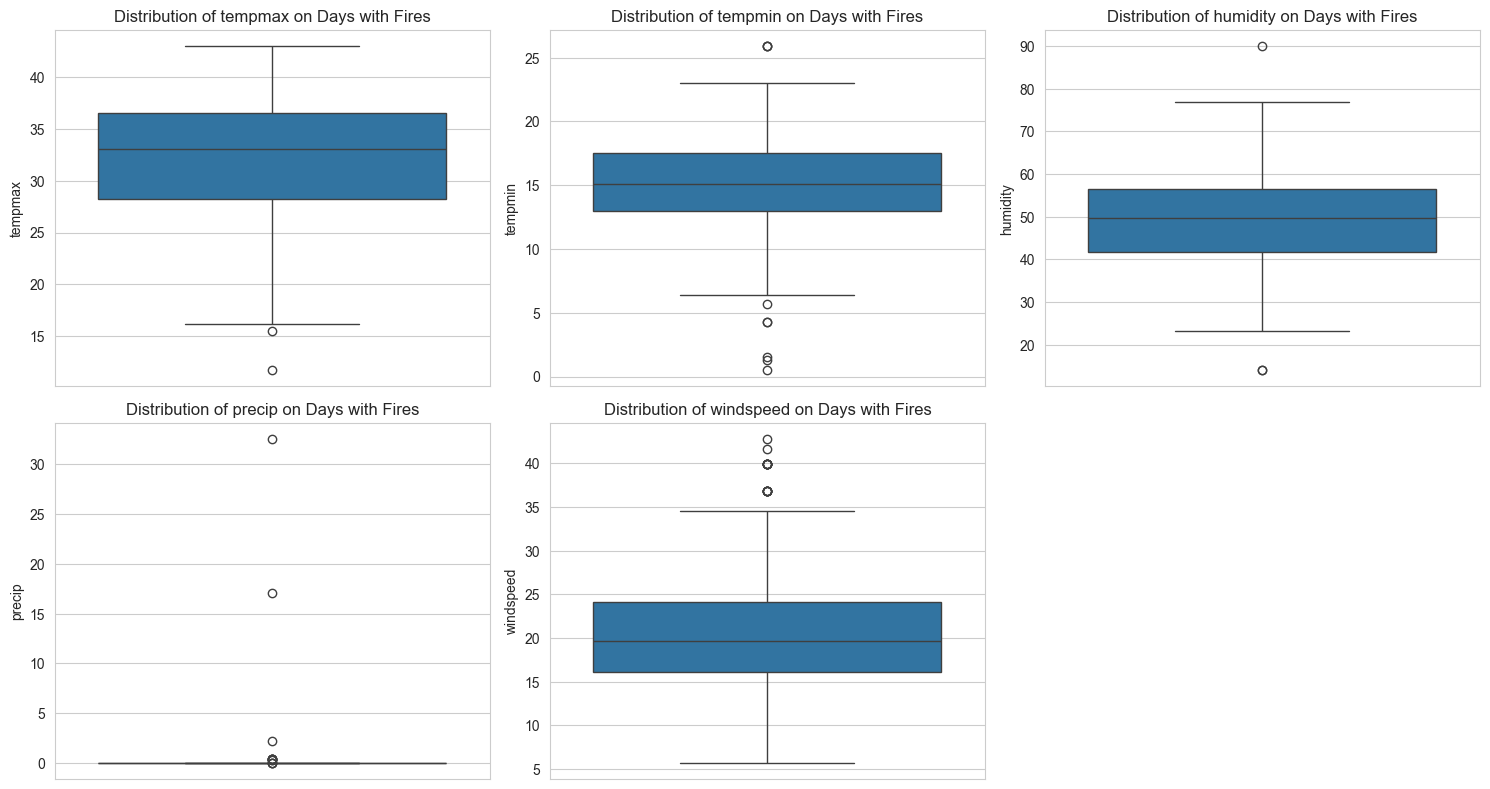

In [37]:
# Boxplots
fire_cols = ['tempmax', 'tempmin', 'humidity', 'precip', 'windspeed']
plt.figure(figsize=(15,8))

for index, column in enumerate(fire_cols, 1):
    plt.subplot(2, 3, index)
    sns.boxplot(y=CA_climate_fire[column][CA_climate_fire['AcresBurned'].notna()])
    plt.title(f'Distribution of {column} on Days with Fires')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


1. **`tempmax` on Days with Fires**:
   - The majority of days with fires have maximum temperatures ranging roughly between 25°C to 35°C. 
   - There are a couple of outlier days with temperatures below 20°C.

2. **`tempmin` on Days with Fires**:
   - Minimum temperatures on days with fires predominantly fall between approximately 10°C to 20°C.
   - There are some outliers, with a few days having temperatures below 10°C.

3. **`humidity` on Days with Fires**:
   - The humidity levels on days with fires generally range from around 40% to 70%.
   - There's an outlier with a day having a humidity level close to 90%.

4. **`precip`on Days with Fires**:
   - Most days with fires have very little to no precipitation, with the main cluster close to 0. However, there are some days (outliers) where the precipitation is between 5mm to 30mm.

5. **`windspeed` on Days with Fires**:
   - Wind speeds on days with fires typically vary between roughly 15 to 30 km/h.
   - There are a few outliers, with some days experiencing wind speeds above 35 km/h.

In summary, fires tend to occur on days with temperatures between 10°C and 35°C, humidity levels between 40% and 70%, and wind speeds between 15 to 30 km/h. Precipitation is usually low on these days, though there are exceptions.

### Violin Plot on TempMax and TempMin

From the visualizations above, `tempmax` and `tempmin` seem to be important predictors of wildfire occurence. Let's draw a violin graph to see the distribution and density of these temperatures on days with and without fires, which might give us more insights into their relationship with wildfire events.

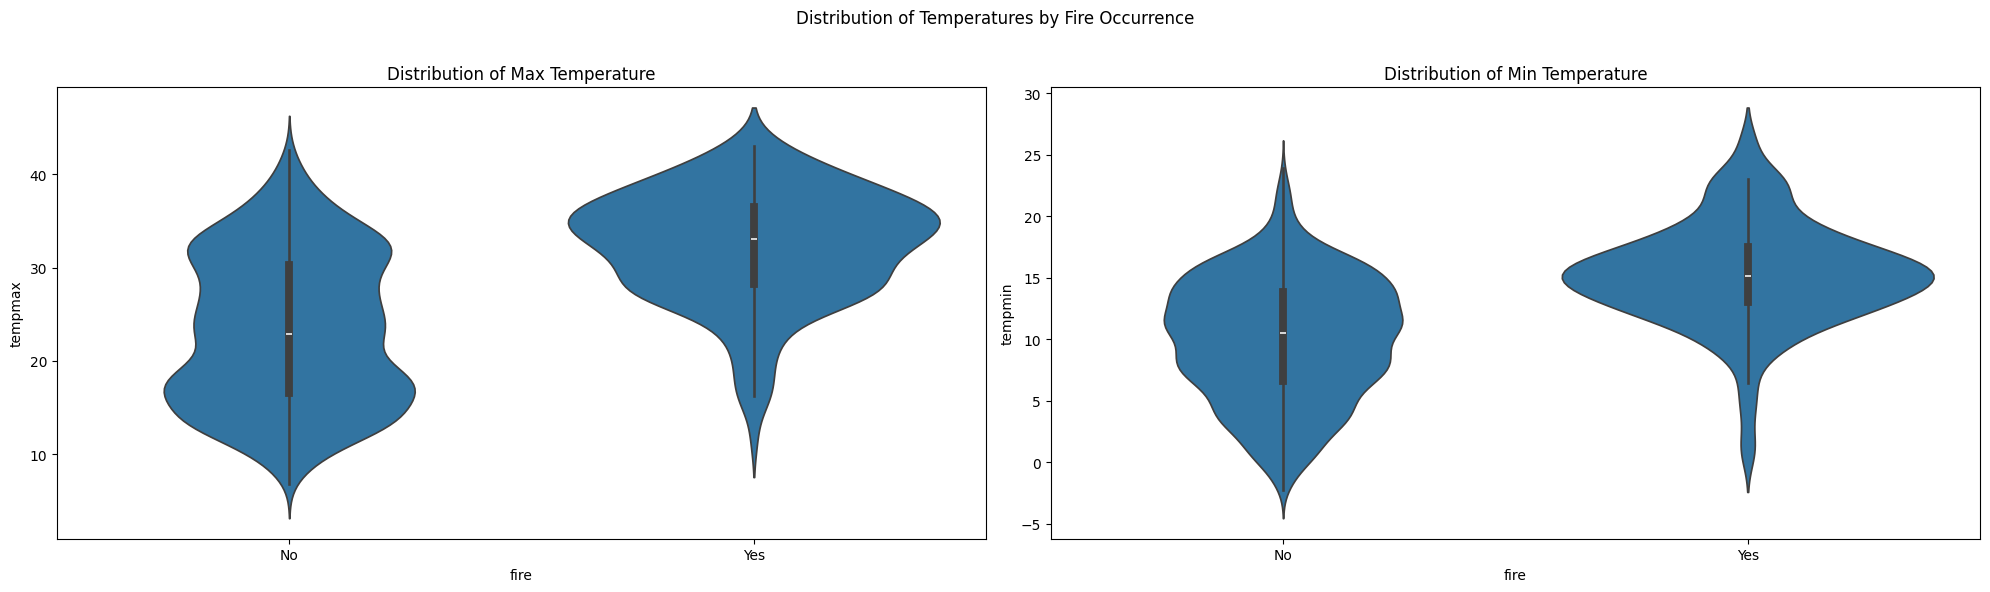

In [32]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Distribution of Temperatures by Fire Occurrence')

# Plot Max Temperature by Fire Occurrence
sns.violinplot(data=CA_climate_fire, x='fire', y='tempmax', ax=axes[0])
axes[0].set_title('Distribution of Max Temperature')

# Plot Min Temperature by Fire Occurrence
sns.violinplot(data=CA_climate_fire, x='fire', y='tempmin', ax=axes[1])
axes[1].set_title('Distribution of Min Temperature')

# Adjust layout for better appearance
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


1. **Max Temperature (`tempmax`) Distribution:**
   - On days without fires (labeled "No"): The distribution is more spread out, with a majority of the days experiencing temperatures between roughly 20°C and 35°C.
   - On days with fires (labeled "Yes"): The temperature distribution is narrower and more concentrated around the median, with most days having temperatures between approximately 25°C and 35°C. 

2. **Min Temperature (`tempmin`) Distribution:**
   - On days without fires: The temperature mostly ranges from 5°C to 20°C, with a median around 10°C.
   - On days with fires: The distribution is slightly shifted towards higher temperatures, with most days ranging from 10°C to 25°C and a median around 15°C.

Overall, it seems that higher max and min temperatures are slightly more associated with days when fires occur. The violin plots reveal that on days with fires, both max and min temperatures tend to be on the higher side.

## Text Data on Wildfire Prevention

### Data Overview

In [17]:
articles_with_sentiment = pd.read_csv("../data/cleaned-data/articles_with_sentiment.csv")

In [18]:
# Display the first few rows of the dataset to understand its structure
articles_with_sentiment.head()

# Data Understanding
# Check data types and null values
articles_with_sentiment.info()

# Descriptive Statistics
# Summary statistics for numerical variables
articles_with_sentiment.describe()

# Frequency distribution of categorical variables
source_counts = articles_with_sentiment['source'].value_counts()
author_counts = articles_with_sentiment['author'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   98 non-null     int64  
 1   source       98 non-null     object 
 2   author       84 non-null     object 
 3   title        98 non-null     object 
 4   description  98 non-null     object 
 5   date         98 non-null     object 
 6   content      98 non-null     object 
 7   neg          98 non-null     float64
 8   neu          98 non-null     float64
 9   pos          98 non-null     float64
 10  compound     98 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 8.6+ KB


The dataset contains 98 entries (rows) and spans 11 columns. A breakdown of each column, along with its corresponding datatype, is as follows:

1. `Unnamed: 0`: Int64 - This is an index for each article.
2. `source`: Object - Indicates the source or publication from which the article originates.
3. `author`: Object - Represents the author of the article. It has some missing values, indicating certain articles might be anonymous or not attributed to a specific author.
4. `title`: Object - The title or headline of the article.
5. `description`: Object - A brief summary or description of the article's content.
6. `date`: Object - The date when the article was published.
7. `content`: Object - The main body or content of the article.
8. `neg`: Float64 - A score representing the negative sentiment present in the article.
9. `neu`: Float64 - A score capturing the neutral sentiment of the article.
10. `pos`: Float64 - Represents the positive sentiment score of the article.
11. `compound`: Float64 - A cumulative sentiment score calculated from the neg, neu, and pos columns.

Key Insights:

- The dataset capture articles on wildfire preventions from various sources and authors.
- Sentiment scores (negative, neutral, positive, and compound) are calculated for each article, giving insights into the overall sentiment portrayed in the content.

With this foundational understanding in place, we can now delve deeper into the dataset to extract meaningful patterns and insights as we proceed with our EDA.

### Data Visualization

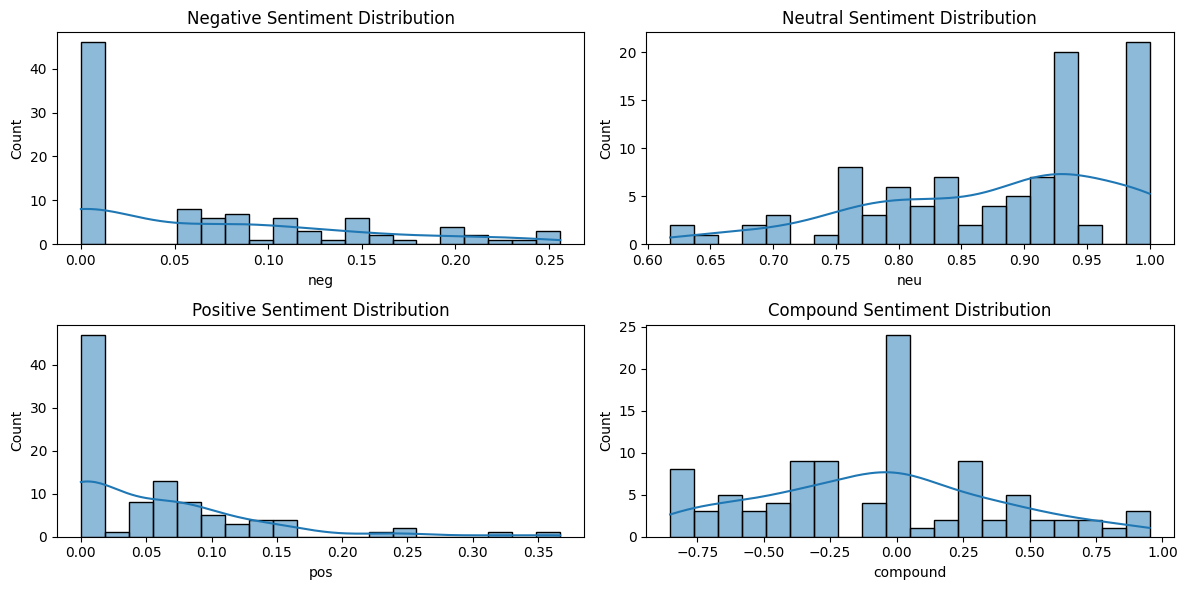

In [19]:
# Data Visualization
# Create histograms for sentiment scores
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(articles_with_sentiment['neg'], bins=20, kde=True)
plt.title('Negative Sentiment Distribution')

plt.subplot(2, 2, 2)
sns.histplot(articles_with_sentiment['neu'], bins=20, kde=True)
plt.title('Neutral Sentiment Distribution')

plt.subplot(2, 2, 3)
sns.histplot(articles_with_sentiment['pos'], bins=20, kde=True)
plt.title('Positive Sentiment Distribution')

plt.subplot(2, 2, 4)
sns.histplot(articles_with_sentiment['compound'], bins=20, kde=True)
plt.title('Compound Sentiment Distribution')

plt.tight_layout()
plt.show()


1. **Negative Sentiment Distribution**:
   - The vast majority of articles have a very low negative sentiment, clustering around the 0.00 to 0.05 range.
   - As the negative sentiment score increases beyond 0.05, the number of articles decreases significantly, suggesting that overtly negative articles are less frequent in this dataset.

2. **Neutral Sentiment Distribution**:
   - There's a notable concentration of articles with high neutral scores, particularly between 0.90 and 1.00.
   - However, there's also a consistent distribution of articles having neutral scores ranging from 0.60 to 0.90, showing a diverse range of neutrality in the articles.

3. **Positive Sentiment Distribution**:
   - Similar to the negative sentiment distribution, a significant portion of articles is clustered around the 0.00 to 0.05 range, indicating low positive sentiment.
   - There's a gradual decline in the number of articles as the positive sentiment score increases.

4. **Compound Sentiment Distribution**:
   - The compound score, which aggregates the positive, negative, and neutral scores, shows a prominent peak around the 0.00 mark. This suggests that a notable portion of articles has a balanced sentiment.
   - The distribution is somewhat symmetrical on either side of this peak, with articles spread out between strongly negative (-1.00) and strongly positive (1.00) sentiments.
   - It's worth noting the presence of articles with scores around the -0.75 to -0.50 and 0.25 to 0.50 range, indicating a moderate level of negative and positive sentiments, respectively.

**Key Insights**:

- A large portion of articles tend to be either neutral or have balanced sentiments, as indicated by the peaks in the neutral and compound distributions.
- While there are some articles with strong negative or positive sentiments, they appear to be less frequent.
- Overall, the dataset seems to be populated with articles that exhibit a wide range of sentiments, from strongly negative to strongly positive, with a significant concentration around neutral and balanced sentiment scores.

### Correlation Analysis

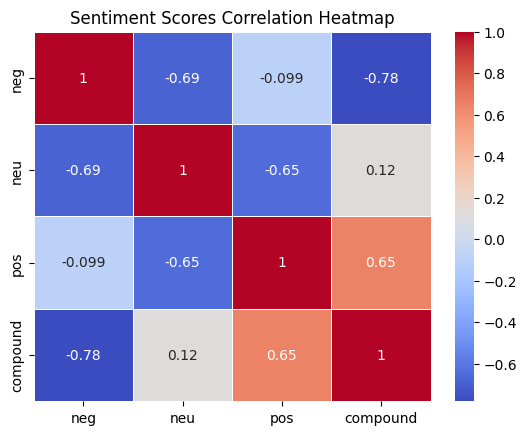

In [20]:
# Correlation Analysis
# Calculate the correlation matrix
correlation_matrix = articles_with_sentiment[['neg', 'neu', 'pos', 'compound']].corr()

# Create a heatmap to visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Sentiment Scores Correlation Heatmap')
plt.show()

 **Sentiment Scores Correlation Heatmap Analysis**:
   
   - **Negative vs. Compound**: There's a strong negative correlation of -0.78 between the negative sentiment scores and the compound sentiment scores. This indicates that as negative sentiment increases, the overall sentiment (compound) becomes more negative.
   
   - **Neutral vs. Negative & Positive**: The neutral sentiment score has a strong negative correlation with both negative (-0.69) and positive (-0.65) sentiments. This suggests that articles that are more neutral tend to have lower positive and negative sentiment scores.
   
   - **Positive vs. Compound**: There's a strong positive correlation of 0.65 between positive sentiment scores and compound scores, indicating that as positive sentiment increases, the overall sentiment becomes more positive.
   
   - **Neutral vs. Compound**: The correlation is relatively weak (0.12) between neutral sentiment scores and compound scores. This suggests that neutrality in articles doesn't have a significant impact on the overall sentiment.
   
   - The correlations between negative and positive sentiments are weak (-0.099), implying that they don't influence each other significantly in this dataset.

Text(0.5, 1.0, 'Box Plot of Sentiment Scores')

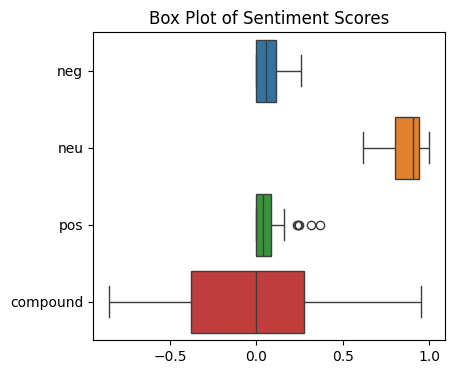

In [21]:
# Identifying Outliers
# Detect and investigate outliers, e.g., using box plots
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=articles_with_sentiment[['neg', 'neu', 'pos', 'compound']], orient='h')
plt.title('Box Plot of Sentiment Scores')

**Box Plot of Sentiment Scores Analysis**:

   - **Negative Sentiment**: Most of the scores cluster around the lower end, with some outliers at the higher end. This is consistent with the earlier histogram, which showed that most articles have low negative sentiment.
   
   - **Neutral Sentiment**: The scores are more evenly spread, with the median slightly above the mid-point. This indicates that a significant portion of articles has a neutral sentiment, but there's still variability.
   
   - **Positive Sentiment**: The distribution for positive sentiment is skewed towards the lower end, with some outliers at the higher end. This matches the histogram's observation, where most articles had low positive sentiment.
   
   - **Compound Sentiment**: The median sentiment is around 0, indicating balanced sentiments in most articles. The spread suggests a good mix of both positive and negative articles, which is in line with the symmetrical distribution seen in the compound sentiment histogram.

**Key Insights**:

- The negative and positive sentiments have an inverse relationship with the compound sentiment, influencing it in opposite directions.
- Neutral articles tend to have lower negative and positive sentiments.
- While most articles have low negative or positive sentiments, there's a wide spread in their overall sentiment, with a good mix of positive, negative, and neutral tones.
- Outliers in the positive sentiment box plot suggest that there are some articles with exceptionally strong positive sentiments.